# Valid dataset EDA: subject keword 분석

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os


In [32]:
dir = os.path.dirname("./resource/data/")
filename = os.path.join(dir, "일상대화요약_dev.json")

In [43]:
subject_keyword = []
cnts = np.zeros(102, dtype=int)

with open (filename, "r") as f:
    data = json.load(f)
    data = np.array(data)
    for i, x in enumerate(data):
        cnts[i] = len(x["input"]["subject_keyword"])
        for keyword in [*x["input"]["subject_keyword"]]:
            subject_keyword.append(keyword)

subject_keyword = np.array(subject_keyword)
# subject_keyword의 총 개수
print(subject_keyword.shape)


(167,)


In [44]:
num, cnt = np.unique(cnts, return_counts=True)
num_cnt = list(zip([int(n) for n in num], [int(c) for c in cnt]))
print(f'subject 개수에 따른 대화의 개수: {num_cnt}')

subject 개수에 따른 대화의 개수: [(1, 64), (2, 22), (3, 10), (4, 3), (5, 1), (6, 2)]


In [45]:
df = pd.DataFrame((cnts), columns=['대화에 등장하는 subject 개수'])

# '대화에 등장하는 subject 개수의 비율'
value_counts = df['대화에 등장하는 subject 개수'].value_counts(normalize=True)
 
value_counts

대화에 등장하는 subject 개수
1    0.627451
2    0.215686
3    0.098039
4    0.029412
6    0.019608
5    0.009804
Name: proportion, dtype: float64

In [36]:
unique_elements, counts_elements = np.unique(subject_keyword, return_counts=True)
subject_cnt = list(zip([str(element) for element in unique_elements], [int(count) for count in counts_elements]))

In [37]:
subject_cnt = sorted(subject_cnt, key=lambda x: x[1], reverse=True)
for i, x in enumerate(subject_cnt):
    if x[1] > 1:
        continue
    break
subject_a = subject_cnt[:i]
subject_b = subject_cnt[i:]

In [38]:
# 2번 이상 나오는 주제 개수, 1번 나오는 주제 개수
len(subject_a), len(subject_b)

(32, 74)

In [39]:
import matplotlib
print(matplotlib.get_cachedir())


/Users/ihayeon/.matplotlib


In [40]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = "./NanumGothic.otf"

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

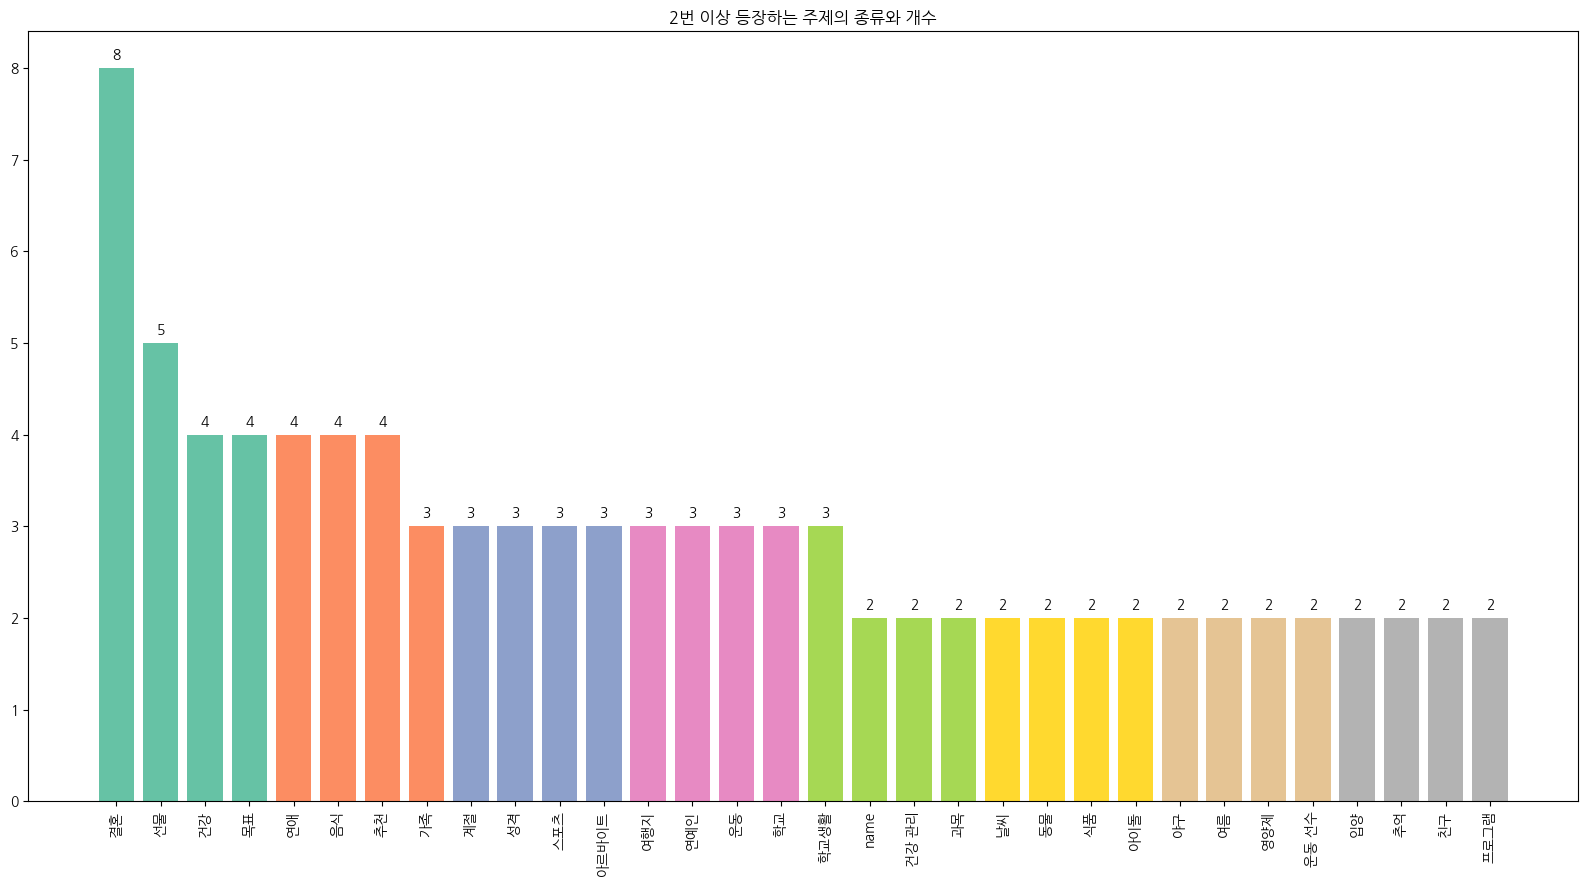

In [41]:
# colormap을 생성
cmap = plt.get_cmap("Set2")

# 각 막대에 대해 다른 색상 지정.\
# np.linspace 함수를 사용하여 0과 1 사이의 값 생성
colors = cmap(np.linspace(0, 1, len(subject_a)))
plt.figure(figsize=(20, 10))
plt.bar(range(len(subject_a)), [x[1] for x in subject_a], color=colors)
plt.xticks(range(len(subject_a)), [x[0] for x in subject_a], rotation='vertical')


for i in range(len(subject_a)):
    plt.text(i, subject_a[i][1] + 0.1, str(subject_a[i][1]), ha='center')

plt.title('2번 이상 등장하는 주제의 종류와 개수')

plt.show()